<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Estatistica_R_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython


/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


#Probabilidade

In [3]:
%%R
x<-1.8
u<-1.7
o<-0.1
Z<- (x-u)/o
print(Z) #normalizacao
um_oitenta<-pnorm(Z)
print(um_oitenta)

[1] 1
[1] 0.8413447


In [ ]:
%%R
x<-1.6
Z<- (x-u)/o
print(Z) #normalizacao
print(pnorm(Z))
um_oitenta-pnorm(Z)

[1] -1
[1] 0.1586553
[1] 0.6826895


In [ ]:
%%R
x<-1.9
Z<- (x-u)/o
print(Z) #normalizacao
print(pnorm(Z))
1-pnorm(Z)

[1] 2
[1] 0.9772499
[1] 0.02275013


#Amostragem

In [5]:
%%R
install.packages('dplyr')
library(dplyr)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 935654 bytes (913 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [6]:
%%R
populacao <- read.csv('http://quant-ibmec.group/benchmark%20-%20ok.csv')
head(populacao)

  Estudo Renda UF SEXO COR Idade   Altura
1     12   800 RO    M PAR    23 1.603808
2     12  1150 RO    F BRA    23 1.739790
3     15   880 RO    F PAR    35 1.760444
4      6  3500 RO    M BRA    46 1.783158
5      9   150 RO    F PAR    47 1.690631
6     12   790 RO    F PAR    34 1.637906


In [8]:
%%R
sample_n(populacao,2)

  Estudo Renda UF SEXO COR Idade   Altura
1     16  8000 SP    M BRA    45 1.615335
2      8  2500 RJ    M PAR    33 1.749081


In [11]:
%%R
sample(populacao$Idade,1)

[1] 45


In [12]:
%%R
print(mean(populacao$Idade))
amostra <- sample_n(populacao,100)
print(mean(amostra$Idade))

[1] 44.07142
[1] 43.64


In [13]:
%%R
print(nrow(populacao))
n <- 50 # tam. amostra
u_amostras <- c()
for (i in 1:300){
    amostra <- sample(populacao$Idade,n)
    u_amostras <- c(u_amostras, mean(amostra))
}
print(mean(populacao$Idade))
mean(u_amostras)


[1] 76840
[1] 44.07142
[1] 44.20947


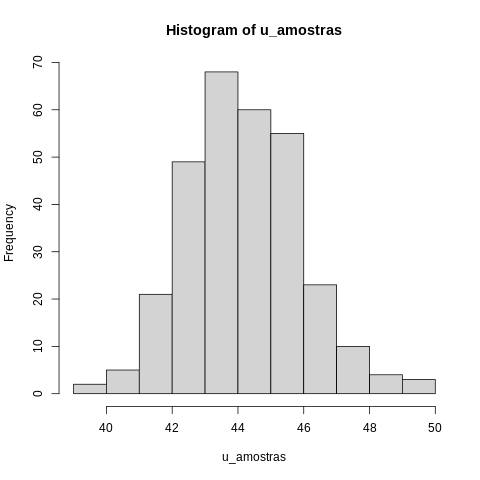

In [14]:
%%R
hist(u_amostras)

In [16]:
%%R
print(sd(u_amostras))
sd(populacao$Idade) / sqrt(n)

[1] 1.734057
[1] 1.765021


# Nível de Confiança e Significância



Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de desvio padrão populacional igual a 150 g. Selecionada uma amostra aleatório de 20 sacos de um lote específico, obteve-se um peso médio de 5.050 g. Construa um intervalo de confiança para a média populacional assumindo um nível de significância de 5%.

In [17]:
%%R
sig <- 0.05
conf <- 1-sig
Z <- qnorm(conf+sig/2)
Z

[1] 1.959964


In [18]:
%%R

devpad <- 150
n <-20
u <- 5050
e <- Z * (devpad / sqrt(n))
print(e)
print(u-e)
print(u+e)

[1] 65.73919
[1] 4984.261
[1] 5115.739


In [ ]:
%%R
install.packages('DescTools')
library(DescTools)

install.packages("ggplot2")
library(ggplot2)

In [20]:
%%R
MeanCI(x = u, sd = devpad / sqrt(n), type = 'norm', conf.level = conf, sides = 'two.sided')


    mean   lwr.ci   upr.ci 
5050.000 4984.261 5115.739 


# Calculando N

In [ ]:
%%R
renda_5000 <- populacao[populacao$Renda <= 5000, ]
u <- mean(renda_5000$Renda)
s <- sd(renda_5000$Renda)
print(u)
print(s)

[1] 1426.537
[1] 1082.795


In [ ]:
%%R
#z <- qnorm(.975)
#e <- 10
#n <- (z * (s / e)) ** 2
#round(n)

NULL


In [ ]:
%%R
Z <- qnorm(.975)
n <- 500
e <- Z * (s / sqrt(n))
e

[1] 94.90938


In [ ]:
%%R
limite_inferior <- mean(renda_5000$Renda) - (Z * (sd(renda_5000$Renda) / sqrt(n)))
limite_superior <- mean(renda_5000$Renda) + (Z * (sd(renda_5000$Renda) / sqrt(n)))
print(limite_inferior)
print(limite_superior)

[1] 1331.628
[1] 1521.447


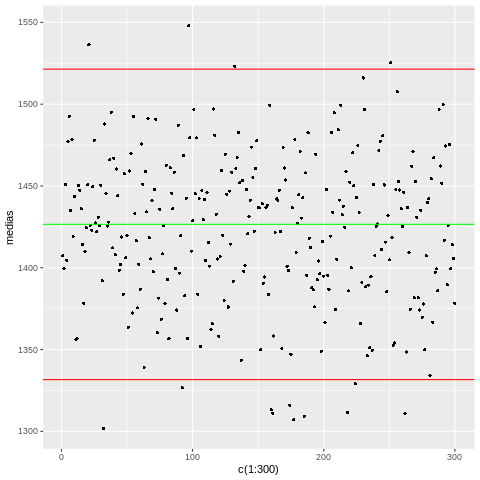

In [ ]:
%%R

medias <- c()

for(i in 1:300){
    medias <- c(medias, mean(sample_n(renda_5000, n)$Renda))
}
medias <- data.frame(medias)

ggplot(data = medias, aes(x = c(1:300), y = medias)) + 
    geom_point(size = 1.5, stroke = 0) + 
    geom_hline(yintercept = u, color = 'green') + 
    geom_hline(yintercept = limite_inferior, color = 'red') + 
    geom_hline(yintercept = limite_superior, color = 'red')